## Exercise 03.1

in questo esercizio dovevamo stimare il prezzo delle opzioni europee di tipo Call e di tipo Put usando le equazioni del moto browniano geometrico ($GBM(r,\sigma^2)$).

per fare ciò è necessario conoscere:
- il costo al tempo $0$ (ossia al momento della stipulazione del contratto) del bene di interesse ($S(0)$)
- il tempo a cui termina il contratto ($T$)
- il costo pattuito a cui potrà essere comprato (nel caso della Call) o venduto (nel caso della Put) il bene al tempo $T$ ($K$)
- altri parametri come la volatilità ($\sigma$) e il tasso di interesse privo di rischi ($r$)

per stimare il prezzo dei contratti di opzione come prima cosa si deve calcolare il costo del bene di interesse al tempo $T$ ($S(T)$). come richiesto ho eseguito questo calcolo con due metodi diversi:
- sampling diretto: ossia considerando un unico intervallo di tempo $[0,T]$ per il calcolo del prezzo finale del bene
 $$S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma \mathcal{N}(0,T)\right]$$
- sampling discreto: ossia dividendo l'intervallo di tempo $[0,T]$ in 100 sottointervalli e calcolando il costo $S(t_i)$ per ogni intervallo fino ad arrivare a $S(T)$
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma \mathcal{N}(0,1)_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

infine il costo adeguado al contratto di opzione si calcola scontando il tasso di interesse garantito dalla banca in un tempo $T$ dal guadagno stimato di cui giova il compratore dell'opzione. in pratica:
- se l'opzione è una Call: $prezzo Call (t=0) = e^{-rT}max(0; S(T)-K)$
- se l'opzione è una Put: $prezzo Put (t=0) = e^{-rT}max(0; K-S(T))$ 

per ogni tipo di opzione ho stimato $10^4$ volte il suo costo sia con il sampling diretto che con quello discreto.
ho poi calcolato la media suddividento i risultati ottenuti in 100 blocchi e ho graficato la media progressiva con il suo rispettivo errore.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

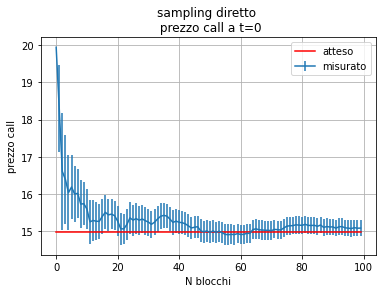

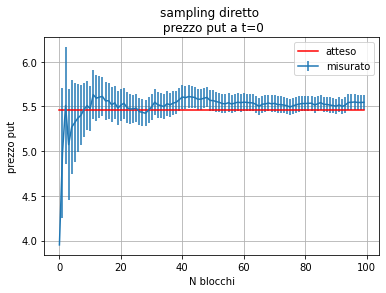

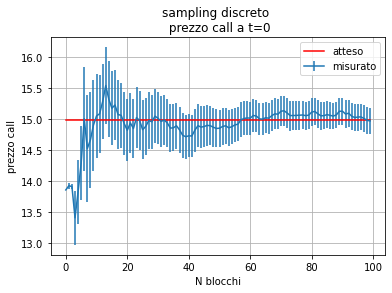

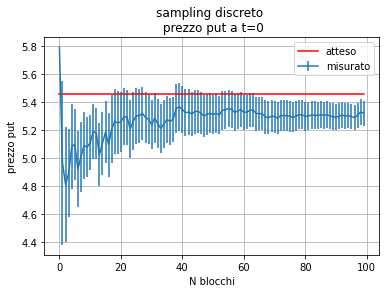

In [3]:
dir_C=np.loadtxt("diretto_C_media")
dir_C_var=np.loadtxt("diretto_C_var")
dir_P=np.loadtxt("diretto_P_media")
dir_P_var=np.loadtxt("diretto_P_var")

x=np.arange(0, len(dir_C),1)
att_C=np.zeros(len(dir_C))+14.978
att_P=np.zeros(len(dir_C))+5.460

plt.errorbar(x,dir_C,yerr=dir_C_var**0.5, label="misurato")
plt.plot(x,att_C,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("prezzo call")
plt.grid(True)
plt.legend()
plt.title("sampling diretto \n prezzo call a t=0")
plt.show()

plt.errorbar(x,dir_P,yerr=dir_P_var**0.5, label="misurato")
plt.plot(x,att_P,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("prezzo put")
plt.grid(True)
plt.legend()
plt.title("sampling diretto \n prezzo put a t=0")
plt.show()

dis_C=np.loadtxt("discreto_C_media")
dis_C_var=np.loadtxt("discreto_C_var")
dis_P=np.loadtxt("discreto_P_media")
dis_P_var=np.loadtxt("discreto_P_var")

plt.errorbar(x,dis_C,yerr=dis_C_var**0.5, label="misurato")
plt.plot(x,att_C,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("prezzo call")
plt.grid(True)
plt.legend()
plt.title("sampling discreto \n prezzo call a t=0")
plt.show()

plt.errorbar(x,dis_P,yerr=dis_P_var**0.5, label="misurato")
plt.plot(x,att_P,color="red", label="atteso")
plt.xlabel('N blocchi')
plt.ylabel("prezzo put")
plt.grid(True)
plt.legend()
plt.title("sampling discreto \n prezzo put a t=0")
plt.show()